# **Q1. 선형 회귀**

|$x$|$y$|
|:-:|:-:|
|9|95|
|8|85|
|3|50|
|2|30|
|5|?|

위 표의 데이터에 대한 $W$와 $b$를 구하는 프로그램을 작성하고 $W$값과 $b$값을 구하라.

**----- 풀이 -----**

- $x$를 넣으면 $y$를 예측해줌 ⇒ 예측한 결과 $= \hat{y}$

- $\hat{y}$을 예측할 선형 회귀(linear regression) 식
  > $\hat{y}(x) = Wx + b$

- 데이터와 예상치의 **오차($\epsilon$)**를 최소화하기 위해 **Cost 함수(비용 함수)**를 정해야 함
  > $\epsilon^k$ : $k$번째 데이터의 오차 <br>
  $x^k$ : $k$번째의 $x$ 데이터 <br>
  $y^k$ : $k$번째의 $y$ 데이터 <br>
  $m$ : 총 데이터의 개수

  > $k$번째 데이터의 오차 : $\epsilon^k = \hat{y}(x^k) - y^k$

  > $C(W,b) = \frac{1}{2m} \displaystyle\sum_{k=1}^{m} (\epsilon^k)^2 = \frac{1}{2m} \displaystyle\sum_{k=1}^{m} \left[ \hat{y}(x^k) - y^k \right]^2 = \frac{1}{2m} \displaystyle\sum_{k=1}^{m} \left[ Wx^k + b - y^k \right] ^2$

- $Cost$ 함수를 $w$와 $b$에 대해 편미분
  > $\frac{\partial{C}}{\partial{W}} = \frac{1}{m} \displaystyle\sum_{k} x^k \left[ Wx^k + b - y^k \right] = \frac{1}{m} \displaystyle\sum_{k} \left[ (x^k)^2W + x^kb - x^ky^k \right] = \left\langle x^2 \right\rangle W + \left\langle x \right\rangle b - \left\langle xy \right\rangle$

  > $\frac{\partial{C}}{\partial{b}} = \frac{1}{m} \displaystyle\sum_{k} \left[ Wx^k + b - y^k \right] = \frac{1}{m} \displaystyle\sum_{k} \left[ x^kW + b - y^k \right] = \left\langle x \right\rangle W + b - \left\langle y \right\rangle$

- 행렬로 표현
  > $\begin{pmatrix} \left\langle x^2 \right\rangle & \left\langle x \right\rangle \\ \left\langle x \right\rangle & 1 \end{pmatrix} \begin{pmatrix} W \\ b \end{pmatrix} = \begin{pmatrix} \left\langle xy \right\rangle \\ \left\langle y \right\rangle \end{pmatrix}$ <br> <br>
  **⇒** $\begin{pmatrix} W \\ b \end{pmatrix} = \begin{pmatrix} \left\langle x^2 \right\rangle & \left\langle x \right\rangle \\ \left\langle x \right\rangle & 1 \end{pmatrix} ^{-1} \begin{pmatrix} \left\langle xy \right\rangle \\ \left\langle y \right\rangle \end{pmatrix}$

In [ ]:
import numpy as np

x = np.array([9,8,3,2])
y = np.array([95,85,50,30])
m = 4   # 데이터의 개수

x1 = np.mean(x)   # <x>
x2 = np.mean(x*x)   # <x^2>
xy1 = np.mean(x*y)   # <xy>
y1 = np.mean(y)   # <y>

M = np.matrix([[x2,x1],[x1,1]])   # 행렬
print(M)

IM = np.linalg.inv(M)   # 역행렬
rhs = np.array([xy1,y1])
sol = np.dot(IM,rhs)   # 행렬 곱
print(sol)

[[39.5  5.5]
 [ 5.5  1. ]]
[[ 8.51351351 18.17567568]]


# **Q2. 선형 회귀 Gradient Descent 예제**

|$x$|$y$|
|:-:|:-:|
|9|95|
|8|85|
|3|50|
|2|30|

앞 표의 데이터에 대한 $W$와 $b$를 경사 따라가기(경사 하강) 방법으로 구하는 프로그램을 작성하고 $W$값과 $b$값을 구하라.

**----- 풀이 -----**

- 경사하강법 : Cost 함수의 기울기 변화를 통해 Cost 함수를 줄이는 방법 <br>
  $\rightarrow$ 초기 시점에 대한 기울기를 구하여 **기울기의 반대방향으로** 이동하는 과정을 통해 **기울기를 수렴**시키는 것으로 오차를 줄이는 과정

- Cost Function (비용 함수, loss function 손실 함수)
  > $C(W,b) = \frac{1}{2m} \displaystyle\sum_{k=1}^{m} \left[ \hat{y}(x^k) - y^k \right] ^2$ <br>
  > *with $\hat{y}(x) = Wx + b$*

- 편미분
  > $\frac{\partial{C}}{\partial{W}} = \frac{1}{m} \displaystyle\sum_{k} x^k \left[ Wx^k + b - y^k \right]$

  > $\frac{\partial{C}}{\partial{b}} = \frac{1}{m} \displaystyle\sum_{k} \left[ Wx^k + b - y^k \right]$

- 가중치 Update
  > $α$ : learning rate (학습 속도, 학습률, 보폭, pace, foot-step)

  > $W ⟹ W' = W - α\frac{\partial{C}}{\partial{W}}$

  > $b ⟹ b' = b - α\frac{\partial{C}}{\partial{b}}$

In [ ]:
# Cost Function
def cost(w,b):
  c = 0
  for i in range(4):
    c += (y[i] - w*x[i]-b)**2
  return (c/(2*m))

# Cost Funtion의 W에 대한 편미분
def DwC(w,b):
  dc = 0
  for i in range(4):
    dc += -2*(y[i] - w*x[i]-b)*x[i]
  return (dc/(2*m))

# Cost Funtion의 b에 대한 편미분
def DbC(w,b):
  dc = 0
  for i in range(4):
    dc += -2*(y[i] - w*x[i]-b)
  return (dc/(2*m))

# 초기값 임의 설정
alpha = 0.05; w = 1; b = 1
c1 = cost(w,b)
c2 = c1 + 1
n = 0

while c2 > c1+1E-10:   ### 이전의 Cost와 이후의 Cost가 10^(-10)만큼의 차이만 나게!
  n += 1
  w -= alpha*DwC(w,b)
  b -= alpha*DbC(w,b)
  c2 = c1
  c1 = cost(w,b)
  print(n,w,b,c1)
  if n>2000: break

1 20.5625 -1.4546875000000004 1767.5800793457029
2 2.164101562500001 1.2729189453124996 1537.8779931295016
3 19.352448266601563 -0.862650275268555 1375.0853875544856
4 3.1810917657623285 1.5556820029102325 1195.6647401353891
5 18.283122977581417 -0.29996091607016906 1071.5003959208393
6 4.068944348777412 1.8460774338195511 931.1828057136033
7 17.337607965641645 0.23593137157712119 836.6133255050104
8 4.843451106315689 2.1421857487614506 726.7281244632286
9 16.501034090432807 0.7472920864543564 654.8116117870169
10 5.518486438053067 2.442343711667045 568.6301233161633
11 15.760331202189825 1.2361354454814908 514.0349788354151
12 6.106239830357509 2.745112719859101 446.33286669702585
13 15.104010167440176 1.7042542878200975 404.9668665641443
14 6.617420157595301 3.0492510300903843 351.68549744934967
15 14.521971313069725 2.1532463674916906 320.40994027669893
16 7.061435218696802 3.3536893639754854 278.3943045106024
17 14.00533608667736 2.584537471940437 254.80376935060585
18 7.4465495107

# **Q3. 단변수 분류 예제**

|$x$|$t$|
|:-:|:-:|
|9|1|
|8|1|
|3|0|
|2|0|

cost 함수 $C(W,b) = \frac{1}{2m} \displaystyle\sum_{k=1}^{m} \left [ \hat{t}(x^{k})-t^{k} \right ]^{2} + \lambda W^2$ 를 사용하여 $W$와 $b$를 경사 하강법으로 구하는 프로그램을 작성하고 $W$와 $b$값을 구하라.

**----- 풀이 ------**

- Classification (분류) : pass/fail, sell/buy, dog/cat 등

- $\hat{y}$을 예측할 선형 회귀(linear regression) 식
  > $\hat{y}(x) = Wx + b$

- 분류로 나눌 식 : **sigmoid function** (logistic function)
  > $\hat{t}(x) = s(\hat{y}(x)) = \frac{1}{1+e^{-\hat{y}}} = \frac{1}{1+e^{-(Wx+b)}}$

- 단변수 분류 : 변수가 하나인 경우 **⇒** 비용함수 = **mean square error**
  > $C(W,b) = \frac{1}{2m} \displaystyle\sum_{k=1}^{m} \left[ \hat{t}(x^k) - t^k \right]^2$

- Cost 함수의 Regularization (정규화) : $\lambda$를 사용하여 underfitting & overfitting 막기 위함
  > $C_T(W,b) = C(W,b) + \lambda W^2$

- 편미분
  > $\frac{\partial C}{\partial W} = \frac{1}{m} \displaystyle\sum_{k=1}^{m} \left [ \hat{t}(x^k) - t^k \right ] \hat{t} (1-\hat{t})x^{k} + 2 \lambda W$

  > $\frac{\partial C}{\partial b} = \frac{1}{m} \displaystyle\sum_{k=1}^{m} \left [ \hat{t}(x^k) - t^k \right ] \hat{t} (1-\hat{t})$

- 가중치 Update
  > $α$ : learning rate (학습 속도, 학습률, 보폭, pace, foot-step)

  > $W ⟹ W' = W - α\frac{\partial{C}}{\partial{W}}$

  > $b ⟹ b' = b - α\frac{\partial{C}}{\partial{b}}$



In [ ]:
import numpy as np

x = np.array([9,8,3,2])
t = np.array([1,1,0,0])
m = 4   # 데이터의 개수

# 시그모이드 함수
def s(x):
  return (1/(1+np.exp(-x)))

lamb = 0.005   # 람다
alpha = 0.1   # 알파
n = 0 ; mn = 50000   # 반복 횟수
w = 1 ; b = 1   # 초기 w, b 임의로 설정
c1 = 1E10 ; c2 = c1+1

while c2 > c1+1E-10:
  c2 = c1 ; c1 = 0 ; Db = 0 ; Dw = 0
  for i in range(m):
    th = s(w*x[i]+b)   # t_hat
    c1 += (th - t[i])**2 + lamb*w*w   # Regularization
    dd = (th - t[i])*th*(1-th)
    Db += dd ; Dw += dd*x[i] + 2*lamb*w   # Cost 함수를 W와 b에 대한 편미분
  n += 1 ; w -= alpha*Dw ; b -= alpha*Db   # W와 b 업데이트
  if n > mn : break
print('w = %.3f , b = %.3f , x_t = %.2f' %(w,b,-b/w))

w = 0.964 , b = -5.303 , x_t = 5.50


$x = x_t = -\frac{b}{W}$

여기서 $x_t$는 $y = 0$이 되는 $x$이다.

> $Wx_t + b = 0$
> $\rightarrow x_t = -\frac{b}{W}$




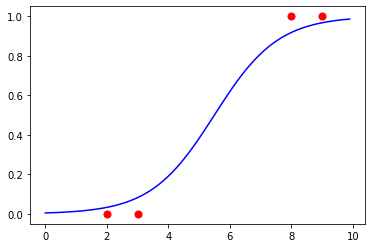

In [ ]:
import matplotlib.pyplot as plt

x1 = np.arange(0,10,0.1) ; y1 = s(w*x1+b)
plt.scatter(x,t,c='r',s=50)   # 원래 데이터
plt.plot(x1,y1,c='b')   # 시그모이드
plt.show()

# **분류에 사용하는 cost 함수 종류**
- MSE (mean square error)
  > $C(W,b) = \frac{1}{2m} \displaystyle\sum_{k=1}^{m} \left( \hat{t} (x^k) - t^k \right)^2$

- cross entropy
  > $C(W,b) = \frac{1}{2m} \displaystyle\sum_{k=1}^{m} -t^k log \left( \hat{t}(x^k) \right ) - \left( 1-t^k \right) log \left( 1-\hat{t}(x^k) \right)$

  > $c \left( \hat{t}(x^k),t^k \right) = -t^k log \left( \hat{t}(x^k) \right) - \left( 1-t^k \right) log \left( 1 - \hat{t}(x^k) \right)$ 라고 두면, <br> <br>
  > $c \left( \hat{t}(x^k),t^k \right) = \begin{cases} -log \left( \hat{t} \right) & \mbox{for } t = 1 \\ -log \left( 1 - \hat{t} \right) & \mbox{for } t = 0 \end{cases}$ <br> <br>
  > 따라서, $\hat{t} = t$일 때, $c(\hat{t},t) = 0$ 이고, $\left| \hat{t} - t \right| = 1$일 때, $c(\hat{t},t) = \infty$


# **Q4. 다변수 선형 회귀 예제**

**------------ A ------------**
> |$x_1$|$x_2$|$y$|
|:-:|:-:|:-:|
|8|85|90|
|7|95|94|
|3|61|61|
|2|20|20|

**------------ B ------------**
> |$x_1$|$x_2$|$y$|
|:-:|:-:|:-:|
|8|85|90|
|7|35|34|
|3|70|21|
|2|20|90|

데이터 A, B 각각에 대해서, $\vec{W} = (w_1,w_2)$와 $b$를 구하는 프로그램을 아래 두 가지 방법으로 각각 작성하고 $\hat{y} = w_{1}x_{1} + w_{2}x_{2} + b$의 평면을 데이터와 함께 3차원으로 나타내어라.

**(a) 역행렬을 이용 ([Q1] 참조)**

**----- 풀이 -----**

- $x$를 넣으면 $y$를 예측해줌 ⇒ 예측한 결과 $= \hat{y}$

- $\hat{y}$을 예측할 선형 회귀(linear regression) 식
  > $\hat{y}(x) = w_1 x_1 + w_2 x_2 + b$

- 데이터와 예상치의 **오차($\epsilon$)**를 최소화하기 위해 **Cost 함수(비용 함수)**를 정해야 함
  > $C(w_1,w_2,b) = \frac{1}{2m} \displaystyle\sum_{k=1}^{m} (\epsilon^k)^2 = \frac{1}{2m} \displaystyle\sum_{k=1}^{m} \left[ \hat{y}(x_1^k,x_2^k) - y^k \right]^2 = \frac{1}{2m} \displaystyle\sum_{k=1}^{m} \left[ w_1 x_1^k + w_2 x_2^k + b - y^k \right] ^2$

- $Cost$ 함수를 $w$와 $b$에 대해 편미분
  > $\frac{\partial{C}}{\partial{w_1}} = \frac{1}{m} \displaystyle\sum_{k} x_1^k \left[ w_1 x_1^k  + w_2 x_2^k+ b - y^k \right] = \left\langle x_1^2 \right\rangle w_1 + \left\langle x_1 x_2 \right\rangle w_2 + \left\langle x_1 \right\rangle b - \left\langle x_1 y \right\rangle$

  > $\frac{\partial{C}}{\partial{w_2}} = \frac{1}{m} \displaystyle\sum_{k} x_2^k \left[ w_1 x_1^k  + w_2 x_2^k+ b - y^k \right] = \left\langle x_2^2 \right\rangle w_2 + \left\langle x_1 x_2 \right\rangle w_1 + \left\langle x_2 \right\rangle b - \left\langle x_2 y \right\rangle$

  > $\frac{\partial{C}}{\partial{b}} = \frac{1}{m} \displaystyle\sum_{k} \left[ w_1 x_1^k  + w_2 x_2^k+ b - y^k \right] = \left\langle x_1 \right\rangle w_1 + \left\langle x_2 \right\rangle w_2 + b - \left\langle y \right\rangle$

- 행렬로 표현
  > $\begin{pmatrix} \left\langle x_1^2 \right\rangle & \left\langle x_1 x_2 \right\rangle & \left\langle x_1 \right\rangle \\ \left\langle x_2^2 \right\rangle & \left\langle x_1 x_2 \right\rangle & \left\langle x_2 \right\rangle \\ \left\langle x_1 \right\rangle & \left\langle x_2 \right\rangle & 1 \end{pmatrix}
  \begin{pmatrix} w_1 \\ w_2 \\ b \end{pmatrix}
  = \begin{pmatrix} \left\langle x_1 y \right\rangle \\ \left\langle x_2 y \right\rangle \\ \left\langle y \right\rangle \end{pmatrix}$ <br> <br>
  **⟹** $\begin{pmatrix} w_1 \\ w_2 \\ b \end{pmatrix}
   = \begin{pmatrix} \left\langle x_1^2 \right\rangle & \left\langle x_1 x_2 \right\rangle & \left\langle x_1 \right\rangle \\ \left\langle x_2^2 \right\rangle & \left\langle x_1 x_2 \right\rangle & \left\langle x_2 \right\rangle \\ \left\langle x_1 \right\rangle & \left\langle x_2 \right\rangle & 1 \end{pmatrix}  ^{-1}
   \begin{pmatrix} \left\langle x_1 y \right\rangle \\ \left\langle x_2 y \right\rangle \\ \left\langle y \right\rangle \end{pmatrix}$

In [ ]:
import numpy as np

# 데이터 A
x1 = np.array([8,7,3,2])
x2 = np.array([85,95,60,20])
y = np.array([90,94,61,20])
m = 4   # 데이터의 개수

x1_avg = np.mean(x1)   # <x1>
x2_avg = np.mean(x2)   # <x2>
x12_avg = np.mean(x1*x1)   # <x1^2>
x22_avg = np.mean(x2*x2)   # <x2^2>
x1x2_avg = np.mean(x1*x2)   # <x1x2>
x1y_avg = np.mean(x1*y)   # <x1y>
x2y_avg = np.mean(x2*y)   # <x2y>
y_avg = np.mean(y)   # <y>

M = np.matrix([[x12_avg,x1x2_avg,x1_avg],[x22_avg,x1x2_avg,x2_avg],[x1_avg,x2_avg,1]])   # 행렬
print(M)

IM = np.linalg.inv(M)   # 역행렬
rhs = np.array([x1y_avg,x2y_avg,y_avg])
sol = np.dot(IM,rhs)   # 행렬 곱
print(sol)

[[3.1500e+01 3.9125e+02 5.0000e+00]
 [5.0625e+03 3.9125e+02 6.5000e+01]
 [5.0000e+00 6.5000e+01 1.0000e+00]]
[[ 0.9477858   0.94851913 -0.14267239]]


In [ ]:
import numpy as np

# 데이터 B
x1 = np.array([8,7,3,2])
x2 = np.array([85,35,70,20])
y = np.array([90,34,21,90])
m = 4   # 데이터의 개수

x1_avg = np.mean(x1)   # <x1>
x2_avg = np.mean(x2)   # <x2>
x12_avg = np.mean(x1*x1)   # <x1^2>
x22_avg = np.mean(x2*x2)   # <x2^2>
x1x2_avg = np.mean(x1*x2)   # <x1x2>
x1y_avg = np.mean(x1*y)   # <x1y>
x2y_avg = np.mean(x2*y)   # <x2y>
y_avg = np.mean(y)   # <y>

M = np.matrix([[x12_avg,x1x2_avg,x1_avg],[x22_avg,x1x2_avg,x2_avg],[x1_avg,x2_avg,1]])   # 행렬
print(M)

IM = np.linalg.inv(M)   # 역행렬
rhs = np.array([x1y_avg,x2y_avg,y_avg])
sol = np.dot(IM,rhs)   # 행렬 곱
print(sol)

[[3.1500e+01 2.9375e+02 5.0000e+00]
 [3.4375e+03 2.9375e+02 5.2500e+01]
 [5.0000e+00 5.2500e+01 1.0000e+00]]
[[ 0.12348801  0.18231449 48.56104903]]


**(b) Gradient Descent ([Q2] 참조)**

**----- 풀이 -----**

- 경사하강법 : Cost 함수의 기울기 변화를 통해 Cost 함수를 줄이는 방법 <br>
  $\rightarrow$ 초기 시점에 대한 기울기를 구하여 **기울기의 반대방향으로** 이동하는 과정을 통해 **기울기를 수렴**시키는 것으로 오차를 줄이는 과정

- Cost Function (비용 함수, loss function 손실 함수)
  > $C(w_1,w_2,b) = \frac{1}{2m} \displaystyle\sum_{k=1}^{m} \left[ \hat{y}(x_1^k,x_2^k) - y^k \right]^2$ <br>
  > *with $\hat{y}(x) = w_1 x_1 + w_2 x_2 + b$*

- 편미분
  > $\frac{\partial{C}}{\partial{w_1}} = \frac{1}{m} \displaystyle\sum_{k} x_1^k \left[ w_1 x_1^k  + w_2 x_2^k+ b - y^k \right]$

  > $\frac{\partial{C}}{\partial{w_2}} = \frac{1}{m} \displaystyle\sum_{k} x_2^k \left[ w_1 x_1^k  + w_2 x_2^k+ b - y^k \right]$

  > $\frac{\partial{C}}{\partial{b}} = \frac{1}{m} \displaystyle\sum_{k} \left[ w_1 x_1^k  + w_2 x_2^k+ b - y^k \right]$

- 가중치 Update
  > $α$ : learning rate (학습 속도, 학습률, 보폭, pace, foot-step)

  > $w_1 ⟹ w_1' = w_1 - α\frac{\partial{C}}{\partial{w_1}}$

  > $w_2 ⟹ w_2' = w_2 - α\frac{\partial{C}}{\partial{w_2}}$
  
  > $b ⟹ b' = b - α\frac{\partial{C}}{\partial{b}}$

In [ ]:
import numpy as np

# 데이터 A
x1 = np.array([8,7,3,2])
x2 = np.array([85,95,60,20])
y = np.array([90,94,61,20])
m = 4   # 데이터의 개수

# Cost Function
def cost(w1, w2 ,b):
  c = 0
  for i in range(4):
    c += (y[i] - w1*x1[i] - w2*x2[i] -b)**2
  return (c/(2*m))

# Cost Funtion의 w1, w2에 대한 편미분
def Dw1C(w1,w2,b):
  dc = 0
  for i in range(4):
    dc += -2*(y[i] - w1*x1[i] - w2*x2[i] -b)*x1[i]
  return (dc/(2*m))

def Dw2C(w1,w2,b):
  dc = 0
  for i in range(4):
    dc += -2*(y[i] - w1*x1[i] - w2*x2[i] -b)*x2[i]
  return (dc/(2*m))

# Cost Funtion의 b에 대한 편미분
def DbC(w1,w2,b):
  dc = 0
  for i in range(4):
    dc += -2*(y[i] - w1*x1[i] - w2*x2[i] -b)
  return (dc/(2*m))

# 초기값 임의 설정
alpha = 0.00005; w1 = 1 ; w2 = 1 ; b = 1
c1 = cost(w1,w2,b)
c2 = c1 + 1
n = 0

while c2 > c1+1E-10:   ### 이전의 Cost와 이후의 Cost가 10^(-10)만큼의 차이만 나게!
  n += 1
  w1 -= alpha*Dw1C(w1,w2,b)
  w2 -= alpha*Dw2C(w1,w2,b)
  b -= alpha*DbC(w1,w2,b)
  c2 = c1
  c1 = cost(w1,w2,b)
  print(n,w1,w2,b,c1)
  if n>4000: break

1 0.998625 0.9820893984375 0.9998210532050781 8.732782684970822
2 0.9976025865047651 0.9687330004365918 0.9996857792543727 5.595217450577729
3 0.9968431016651657 0.958772737742178 0.9995830727923316 3.8504598609938734
4 0.9962796863297636 0.9513450221507881 0.9995046523951195 2.880225443322413
5 0.9958624826648707 0.9458058634814542 0.9994443424855188 2.340693205745159
6 0.9955543109646962 0.9416750289663863 0.9993975378465126 2.040668345410022
7 0.9953274457863102 0.9385944021030739 0.9993608043013388 1.8738298013942138
8 0.99516121186698 0.9362969302496061 0.9993315809348458 1.7810538358533778
9 0.995040191365048 0.9345834683985575 0.9993079580356624 1.7294625837135835
10 0.9949528869735923 0.9333055112451358 0.9992885115044705 1.7007731826612178
11 0.9948907249849998 0.9323523162413022 0.9992721793698648 1.6848188572544534
12 0.9948473118618354 0.9316413010714734 0.9992581697044486 1.6759460708369955
13 0.9948178798510162 0.9311108829116317 0.9992458919565378 1.671011026885545
14 0.

In [ ]:
import numpy as np

# 데이터 B
x1 = np.array([8,7,3,2])
x2 = np.array([85,35,70,20])
y = np.array([90,34,21,90])
m = 4   # 데이터의 개수

# Cost Function
def cost(w1, w2 ,b):
  c = 0
  for i in range(4):
    c += (y[i] - w1*x1[i] - w2*x2[i] -b)**2
  return (c/(2*m))

# Cost Funtion의 w1, w2에 대한 편미분
def Dw1C(w1,w2,b):
  dc = 0
  for i in range(4):
    dc += -2*(y[i] - w1*x1[i] - w2*x2[i] -b)*x1[i]
  return (dc/(2*m))

def Dw2C(w1,w2,b):
  dc = 0
  for i in range(4):
    dc += -2*(y[i] - w1*x1[i] - w2*x2[i] -b)*x2[i]
  return (dc/(2*m))

# Cost Funtion의 b에 대한 편미분
def DbC(w1,w2,b):
  dc = 0
  for i in range(4):
    dc += -2*(y[i] - w1*x1[i] - w2*x2[i] -b)
  return (dc/(2*m))

# 초기값 임의 설정
alpha = 0.0005; w1 = 1 ; w2 = 1 ; b = 1
c1 = cost(w1,w2,b)
c2 = c1 + 1
n = 0

while c2 > c1+1E-10:   ### 이전의 Cost와 이후의 Cost가 10^(-10)만큼의 차이만 나게!
  n += 1
  w1 -= alpha*Dw1C(w1,w2,b)
  w2 -= alpha*Dw2C(w1,w2,b)
  b -= alpha*DbC(w1,w2,b)
  c2 = c1
  c1 = cost(w1,w2,b)
  print(n,w1,w2,b,c1)
  if n>4000: break

1 0.985 0.624078125 1.01003044921875 883.9818959527823
2 1.0254246992675782 0.8880712956593323 1.0130250007349142 861.1204052430054
3 1.026431226202312 0.6980997636270988 1.0210022913738297 850.8410697791643
4 1.055304025878461 0.8301917059435606 1.0254359978824281 844.2402876917791
5 1.0643099906657087 0.7338114865296261 1.0323749533854198 841.3705036896997
6 1.0873126088452214 0.7995241121063219 1.0375279764438232 839.0530229826945
7 1.1002885113491836 0.7502520599375193 1.0439393746038685 837.9539347787257
8 1.1202808475556012 0.7825616738518275 1.049449458859067 836.8065360496946
9 1.1351990547124657 0.7570033874630552 1.0555903975719512 836.1058122340276
10 1.1536208210731782 0.7725065092295424 1.0612752544532067 835.3002176557108
11 1.1694612114620535 0.7588878556283806 1.06727515758708 834.6781912046326
12 1.18703735569214 0.7659372692631575 1.0730430733008982 833.9847174441088
13 1.2032868732337103 0.7583324475367558 1.0789671078333236 833.3743460982521
14 1.220382608978735 0.7

# **Q5. 다변수 분류 예제**

|$x_1$|$x_2$|$t$|
|:-:|:-:|:-:|
|9|18|1|
|8|15|1|
|3|10|0|
|2|8|0|

cost 함수 $C(\vec{w},b) = \frac{1}{2m} \displaystyle\sum_{k=1}^{m} \left [ \hat{t}(x^{k})-t^{k} \right ]^{2} + \lambda w^2$ 를 사용하여 $\vec{w}$와 $b$를 경사 하강법으로 구하는 프로그램을 작성하고 $\vec{w}$값과 $b$값을 구하라.

**----- 풀이 ------**

- $\hat{y}$을 예측할 선형 회귀(linear regression) 식
  > $\hat{y}(\vec{x}) = w_1x_1 + w_2x_2+ b$

- 분류로 나눌 식 : **sigmoid function** (logistic function)
  > $\hat{t}(\vec{x}) = s(\hat{y}(\vec{x})) = \frac{1}{1+e^{-\hat{y}(x_1,x_2)}} $

- 다변수 분류 : 변수가 여러 개인 경우 **⇒** 비용함수 = **mean square error** & 정규화(Regularization)을 통해 underfitting&overfitting 막기
  > $C(\vec{w},b) = \frac{1}{2m} \displaystyle\sum_{k=1}^{m} \left[ \hat{t} \left( \vec{x^k} \right) - t^k \right]^2 + \lambda(w_1^2 + w_2^2)$

- 편미분
  > $\frac{\partial C}{\partial \vec{w}} = \frac{1}{m} \displaystyle\sum_{k=1}^{m} \left [ \hat{t}(\vec{x^k}) - t^k \right ] \hat{t} (1-\hat{t})\vec{x^{k}} + 2 \lambda\vec{w}$

  > $\frac{\partial C}{\partial b} = \frac{1}{m} \displaystyle\sum_{k=1}^{m} \left [ \hat{t}(\vec{x^k}) - t^k \right ] \hat{t} (1-\hat{t})$

- 가중치 Update
  > $α$ : learning rate (학습 속도, 학습률, 보폭, pace, foot-step)

  > $\vec{w} ⟹ \vec{w'} = \vec{w} - α\frac{\partial{C}}{\partial{\vec{w}}}$

  > $b ⟹ b' = b - α\frac{\partial{C}}{\partial{b}}$

- 분류의 경계직선 식 (2가지로 분류 시) : $\hat{y} = 0$인 $x$를 찾으면 됨
  > $x_2 = -\frac{w_1}{w_2} x_1 - \frac{b}{w_2}$



In [ ]:
import numpy as np

x = np.array([[9,18],[8,15],[3,10],[2,8]], float)
t = np.array([1,1,0,0])
m = 4   # 데이터의 개수

def s(y):
  return (1/(1+np.exp(-y)))

lamb = 0.1 ; alpha = 0.035 ; mn = 40000
n = 0 ; w = np.array([-1.0,1.0]) ; b = 1 ; Dw = np.empty(2)
c1 = 1E10 ; c2 = c1+1

while c2 > c1+1E-10:
  c2 = c1 ; c1 = 0 ; Db = 0
  for j in range(2): Dw[j] = 0.0
  for k in range(m):
    th = s(np.dot(w,x[k]) + b)   ### t_hat
    c1 += (th - t[k])**2 + lamb*np.dot(w,w)   ### cost 함수 시그마 안 부분 // np.dot(w,w) = w[1]^2 + w[2]^2
    dd = (th-t[k])*th*(1-th)   ### 편미분에서 공통적인 부분
    Db += dd
    Dw += dd*x[k]
  n+=1 ; w -= alpha*(Dw/m + 2*lamb*w) ; b -= alpha*(Db/m)
  if n > mn : break
print('w_1 = %.3f , w_2 = %.3f, b = %.3f , x_2 = %.3fx_1 + %.3f' %(w[0], w[1], b, -w[0]/w[1], -b/w[1]))

w_1 = 0.264 , w_2 = 0.282, b = -5.005 , x_2 = -0.934x_1 + 17.722


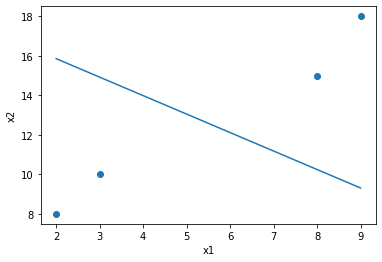

In [ ]:
import matplotlib.pyplot as plt

x1 = [x[i][0] for i in range(m)]
x2 = [x[i][1] for i in range(m)]
xlist = np.arange(2,10)
eq = (-w[0]/w[1])*xlist - (b/w[1])

plt.scatter(x1,x2)
plt.plot(xlist, eq)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# **Q6. 다항 분류 예제**
|$x_1$ (시간)|$x_2$ (수시)|$z$ (학점)|
|:-:|:-:|:-:|
|7|18|A|
|6|17|A|
|5|18|A|
|8|13|B|
|8|10|B|
|9|14|B|
|3|9|D|
|2|11|D|

위 데이터를 학습한 weight $w_{ij}$와 bias $b_j$를 구하고, 매주 8시간 공부하고 수시에 15점을 맞은 학생의 학점을 예측하라.

**----- 풀이 ------**

- 다항 분류 : 3가지 이상으로 분류할 때 ⇒ 다변수를 분류 종류별로 나누어서 계산

- $\hat{y}$을 예측할 선형 회귀(linear regression) 식
  > $\hat{y}_A(\vec{x}) = w_{A,1}x_{1} + w_{A,2}x_{2}+ b_A$ <br>
  $\hat{y}_B(\vec{x}) = w_{B,1}x_{1} + w_{B,2}x_{2}+ b_B$ <br>
  $\hat{y}_D(\vec{x}) = w_{D,1}x_{1} + w_{D,2}x_{2}+ b_D$

- 분류로 나눌 식 : **sigmoid function** (logistic function)
  > $\hat{z}_A(\vec{x}) = s(\hat{y}_A(\vec{x})) = \frac{1}{1+e^{-\hat{y}_A(x_1,x_2)}}$ <br>
  $\hat{z}_B(\vec{x}) = s(\hat{y}_B(\vec{x})) = \frac{1}{1+e^{-\hat{y}_B(x_1,x_2)}}$ <br>
  $\hat{z}_D(\vec{x}) = s(\hat{y}_D(\vec{x})) = \frac{1}{1+e^{-\hat{y}_D(x_1,x_2)}}$

- 다변수 분류 : 변수가 여러 개인 경우 **⇒** 비용함수 = **mean square error** & 정규화(Regularization)을 통해 underfitting&overfitting 막기
  > $C_A(\vec{w_A},b_A) = \frac{1}{2m} \displaystyle\sum_{k=1}^{m} \left[ \hat{z_A} \left( \vec{x^k} \right) - z_A^k \right]^2 + \lambda(w_{A,1}^2 + w_{A,2}^2)$ <br>
  $C_B(\vec{w_B},b_B) = \frac{1}{2m} \displaystyle\sum_{k=1}^{m} \left[ \hat{z_B} \left( \vec{x^k} \right) - z_B^k \right]^2 + \lambda(w_{B,1}^2 + w_{B,2}^2)$ <br>
  $C_D(\vec{w_D},b_D) = \frac{1}{2m} \displaystyle\sum_{k=1}^{m} \left[ \hat{z_D} \left( \vec{x^k} \right) - z_D^k \right]^2 + \lambda(w_{D,1}^2 + w_{D,2}^2)$


- 편미분
  > $\frac{\partial C_A}{\partial \vec{w_A}} = \frac{1}{m} \displaystyle\sum_{k=1}^{m} \left [ \hat{z_A}(\vec{x^k}) - z_A^k \right ] \hat{z_A} (1-\hat{z_A})\vec{x^{k}} + 2 \lambda_A\vec{w_A}$ <br>
  $\frac{\partial C_B}{\partial \vec{w_B}} = \frac{1}{m} \displaystyle\sum_{k=1}^{m} \left [ \hat{z_B}(\vec{x^k}) - z_B^k \right ] \hat{z_B} (1-\hat{z_B})\vec{x^{k}} + 2 \lambda_B\vec{w_B}$ <br>
  $\frac{\partial C_D}{\partial \vec{w_D}} = \frac{1}{m} \displaystyle\sum_{k=1}^{m} \left [ \hat{z_D}(\vec{x^k}) - z_D^k \right ] \hat{z_D} (1-\hat{z_D})\vec{x^{k}} + 2 \lambda_D\vec{w_D}$ <br>

  > $\frac{\partial C_A}{\partial b_A} = \frac{1}{m} \displaystyle\sum_{k=1}^{m} \left [ \hat{z_A}(\vec{x^k}) - z_A^k \right ] \hat{z_A} (1-\hat{z_A})$ <br>
  $\frac{\partial C_B}{\partial b_B} = \frac{1}{m} \displaystyle\sum_{k=1}^{m} \left [ \hat{z_B}(\vec{x^k}) - z_B^k \right ] \hat{z_B} (1-\hat{z_B})$ <br>
  $\frac{\partial C_D}{\partial b_D} = \frac{1}{m} \displaystyle\sum_{k=1}^{m} \left [ \hat{z_D}(\vec{x^k}) - z_D^k \right ] \hat{z_D} (1-\hat{z_D})$ <br>

- 가중치 Update
  > $α$ : learning rate (학습 속도, 학습률, 보폭, pace, foot-step)

  > $\vec{w_A} ⟹ \vec{w_A'} = \vec{w_A} - α_A\frac{\partial{C_A}}{\partial{\vec{w_A}}}$ <br>
  $\vec{w_B} ⟹ \vec{w_B'} = \vec{w_B} - α_A\frac{\partial{C_B}}{\partial{\vec{w_B}}}$ <br>
  $\vec{w_D} ⟹ \vec{w_D'} = \vec{w_D} - α_A\frac{\partial{C_D}}{\partial{\vec{w_D}}}$ <br>

  > $b_A ⟹ b_A' = b_A - α_A\frac{\partial{C_A}}{\partial{b_A}}$ <br>
  $b_B ⟹ b_B' = b_B - α_B\frac{\partial{C_B}}{\partial{b_B}}$ <br>
  $b_D ⟹ b_D' = b_D - α_D\frac{\partial{C_D}}{\partial{b_D}}$

- 분류의 경계직선 식 (2가지로 분류 시) : $\hat{y} = 0$인 $x$를 찾으면 됨
  > $x_2 = -\frac{w_1}{w_2} x_1 - \frac{b}{w_2}$



In [ ]:
import numpy as np

m = 8   # 데이터의 개수
x = np.array([[7,18],[6,17],[5,18],[8,13],[8,10],[9,14],[3,9],[2,11]], float)
zA = np.array([1,1,1,0,0,0,0,0]) ; zB = np.array([0,0,0,1,1,1,0,0]) ; zD = np.array([0,0,0,0,0,0,1,1])
z = np.array([zA,zB,zD],float)

def s(y):
  return (1/(1+np.exp(-y)))

alpha = np.array([0.01, 0.02, 0.02])
mn = np.array([200000, 40000, 50000])
lamb = np.array([0.01, 0.1, 0.1])
wd = np.array([0., 1.], float)
w = np.ones((3,2), float)
b = np.array([1.,1.,1.])
Dw = np.empty((3,2)) ; Db = np.empty(3)
c1 = np.empty(3) ; c2 = np.empty(3)

for i in range(3): ### 각각 A, B, D항에 대해
  n = 0 ; c1[i] = 1.E10 ; c2[i] = c1[i]+1.
  while c2[i] > c1[i]+1E-13:
    c2[i] = c1[i] ; c1[i] = 0. ; Db[i] = 0.
    for j in range(2) : Dw[i][j] = 0.
    for k in range(m) :
      zh = s(np.dot(w[i],x[k]) + b[i])   ### z_hat
      c1[i] += (zh - z[i][k])**2
      dd = (zh-z[i][k])*zh*(1.-zh)
      Db[i] += dd
      Dw[i] += dd*x[k]
    n+=1 ; c1[i] = (c1[i]/m + lamb[i]*(w[i][0]**2 + w[i][1]**2)) ; w[i] -= alpha[i]*(Dw[i]/m + 2.*lamb[i]*w[i]) ; b[i] -= alpha[i]*(Db[i]/m)
    if n%(mn[i]//10) == 0 : print(i,n,w[i],b[i],c1[i])
    if n>mn[i] : break
  print(i,w[i],b[i])

0 20000 [-0.35683117  0.26033136] -1.6939812387997462 0.12397534598451843
0 40000 [-0.31537289  0.39854977] -4.024464598678347 0.0672930649267571
0 60000 [-0.31184252  0.48998884] -5.41777377925957 0.04669258462974986
0 80000 [-0.31239673  0.55320162] -6.366012020286954 0.036913393227730545
0 100000 [-0.31277992  0.59975216] -7.06649895235797 0.03141510735834269
0 120000 [-0.31245659  0.63558774] -7.611019885213148 0.027983131390260367
0 140000 [-0.31151975  0.66406834] -8.049139055908398 0.025684539600466055
0 160000 [-0.31014712  0.68725394] -8.410530637068282 0.024064681483377325
0 180000 [-0.30849369  0.70648771] -8.714305035563575 0.022878194328595787
0 200000 [-0.30667645  0.72268744] -8.97345200810434 0.0219823067303086
0 [-0.30667635  0.72268819] -8.973464015040408
1 4000 [ 0.40875133 -0.25904529] 0.6611691802555738 0.09804624978446339
1 8000 [ 0.41534746 -0.24417182] 0.40518242742104654 0.09659385556989644
1 12000 [ 0.42053567 -0.23332803] 0.21530155222323605 0.095766230839944

[-0.30667635  0.72268819] -0.4243550104048265 -8.973464015040408
[ 0.43500699 -0.20636612] -2.107937990085833 -0.27040112973252234
[-0.35010759 -0.22177806] 1.5786394046637684 3.9817501337483865


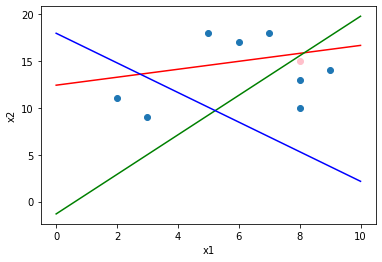

In [ ]:
import matplotlib.pyplot as plt

x1 = [x[i][0] for i in range(m)]
x2 = [x[i][1] for i in range(m)]
xlist = np.arange(0,11)

print(w[0],w[0][0]/w[0][1],b[0])
print(w[1],w[1][0]/w[1][1],b[1])
print(w[2],w[2][0]/w[2][1],b[2])
eqA = (-w[0][0]/w[0][1])*xlist - (b[0]/w[0][1])
eqB = (-w[1][0]/w[1][1])*xlist - (b[1]/w[1][1])
eqD = (-w[2][0]/w[2][1])*xlist - (b[2]/w[2][1])

plt.scatter(x1,x2)
plt.scatter(8,15,c='pink')
plt.plot(xlist, eqA , c='r')
plt.plot(xlist, eqB, c='g')
plt.plot(xlist, eqD, c='b')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# **Q7. 신경망 학습 예제 (오차 역전파)**

|$n$|$i_1, i_2$|$P, F$|
|:--:|:--:|:--:|
|0|0.05, 0.10|0.01, 0.99|
|1|0.08, 0.10|0.05, 0.95|
|2|0.10, 0.07|0.10, 0.90|
|3|0.15, 0.30|0.98, 0.02|

노드 2개의 은닉층이 1개를 포함한 2 x 2 x 2 신경망을 다음 방법으로 각각 학습 시키면서, epoch가 증가함에 따라 cost가 어떻게 줄어드는지 그래프로 나타내어라. 또, $(i_1,i_2) = (0.09,0.15)$일 때, $P/F$ 예상 결과를 출력하라.

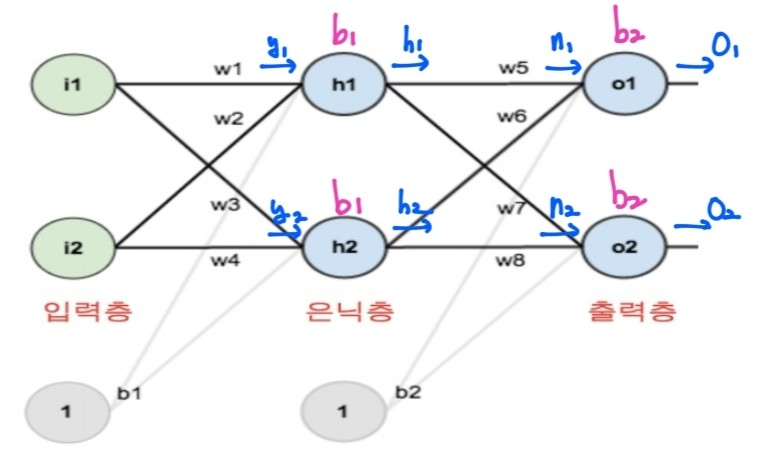

**(a) 0번 데이터만 이용**

**----- 풀이 -----**

- $i_1$ <br>
⟼ $y_1 = w_1 i_1 + w_2 i_2 + b_1$ <br>
⟼ $h_1 = Sigmoid(y_1)$ <br>
⟼ $n_1 = w_5 h_1 + w_6 h_2 + b_2$ <br>
⟼ $o_1 = Sigmoid(n_1)$

- $i_2$ <br>
⟼ $y_2 = w_3 i_1 + w_4 i_2 + b_1$ <br>
⟼ $h_2 = Sigmoid(y_2)$ <br>
⟼ $n_2 = w_7 h_1 + w_8 h_2 + b_2$ <br>
⟼ $o_2 = Sigmoid(n_2)$


---


- $Sigmoid(x) = \frac{1}{1+e^{-x}}$ <br>
⟼ $S'(x) = \frac{-e^{-x}}{(1+e^{-x})^2} = S(1-S)$

- 오차(비용 함수)
  > $E = C_T = (o_1 - t_1)^2 + (o_2 - t_2)^2 = E_1 + E_2$

- 가중치 Update
  > $w ⟹ w' = w - \alpha \frac{\partial E}{\partial w}$ <br>
  $b ⟹ b' = b - \alpha \frac{\partial E}{\partial b}$

- 편미분
  > $\frac{\partial E_1}{\partial h_1} = \left( \frac{\partial E_1}{\partial o_1} \right) \left( \frac{\partial o_1}{\partial n_1} \right) \left( \frac{\partial n_1}{\partial h_1} \right) = 2(o_1 - t_1)(o_1(1-o_1))(w_5)$ <br> <br>
  $\frac{\partial E_2}{\partial h_1} = \left( \frac{\partial E_2}{\partial o_2} \right) \left( \frac{\partial o_2}{\partial n_2} \right) \left( \frac{\partial n_2}{\partial h_1} \right) = 2(o_2 - t_2)(o_2(1-o_2))(w_7)$

  > $\frac{\partial E_1}{\partial h_2} = \left( \frac{\partial E_1}{\partial o_1} \right) \left( \frac{\partial o_1}{\partial n_1} \right) \left( \frac{\partial n_1}{\partial h_2} \right) = 2(o_1 - t_1)(o_1(1-o_1))(w_6)$ <br> <br>
  $\frac{\partial E_2}{\partial h_2} = \left( \frac{\partial E_2}{\partial o_2} \right) \left( \frac{\partial o_2}{\partial n_2} \right) \left( \frac{\partial n_2}{\partial h_2} \right) = 2(o_2 - t_2)(o_2(1-o_2))(w_8)$

  > $\frac{\partial E}{\partial w_1} = \left( \frac{\partial E}{\partial h_1} \right) \left( \frac{\partial h_1}{\partial y_1} \right) \left( \frac{\partial y_1}{\partial w_1} \right) = \left( \frac{\partial E_1}{\partial h_1} + \frac{\partial E_2}{\partial h_1} \right) \left( h_1 (1-h_1) \right) (i_1)$

  > $\frac{\partial E}{\partial w_2} = \left( \frac{\partial E}{\partial h_1} \right) \left( \frac{\partial h_1}{\partial y_1} \right) \left( \frac{\partial y_1}{\partial w_2} \right) = \left( \frac{\partial E_1}{\partial h_1} + \frac{\partial E_2}{\partial h_1} \right) \left( h_1 (1-h_1) \right) (i_2)$

  > $\frac{\partial E}{\partial w_3} = \left( \frac{\partial E}{\partial h_2} \right) \left( \frac{\partial h_2}{\partial y_2} \right) \left( \frac{\partial y_2}{\partial w_3} \right) = \left( \frac{\partial E_1}{\partial h_2} + \frac{\partial E_2}{\partial h_2} \right) \left( h_2 (1-h_2) \right) (i_1)$

  > $\frac{\partial E}{\partial w_4} = \left( \frac{\partial E}{\partial h_2} \right) \left( \frac{\partial h_2}{\partial y_2} \right) \left( \frac{\partial y_2}{\partial w_4} \right) = \left( \frac{\partial E_1}{\partial h_2} + \frac{\partial E_2}{\partial h_2} \right) \left( h_2 (1-h_2) \right) (i_2)$

  > $\frac{\partial E}{\partial w_5} = \left( \frac{\partial E}{\partial o_1} \right) \left( \frac{\partial o_1}{\partial n_1} \right) \left( \frac{\partial n_1}{\partial w_5} \right) = 2(o_1 - t_1)(o_1(1-o_1))(h_1)$

  > $\frac{\partial E}{\partial w_6} = \left( \frac{\partial E}{\partial o_1} \right) \left( \frac{\partial o_1}{\partial n_1} \right) \left( \frac{\partial n_1}{\partial w_6} \right) = 2(o_1 - t_1)(o_1(1-o_1))(h_2)$

  > $\frac{\partial E}{\partial w_7} = \left( \frac{\partial E}{\partial o_2} \right) \left( \frac{\partial o_2}{\partial n_2} \right) \left( \frac{\partial n_2}{\partial w_7} \right) = 2(o_2 - t_2)(o_2(1-o_2))(h_1)$

  > $\frac{\partial E}{\partial w_8} = \left( \frac{\partial E}{\partial o_2} \right) \left( \frac{\partial o_2}{\partial n_2} \right) \left( \frac{\partial n_2}{\partial w_8} \right) = 2(o_2 - t_2)(o_2(1-o_2))(h_2)$

  > $\frac{\partial E}{\partial b_1} = \left( \frac{\partial E}{\partial h_1} \right) \left( \frac{\partial h_1}{\partial y_1} \right) \left( \frac{\partial y_1}{\partial b_1} \right) = 2(o_2 - t_2)(o_2(1-o_2))(h_2)$



w_1 = 0.7387213954854849
w_2 = 0.16898094734083963
w_3 = 0.1447408167903578
w_4 = 0.41236683253117046
w_5 = -0.9370558935821657
w_6 = -0.7690489860206263
w_7 = 2.8281515618472124
w_8 = 2.8252344980510022
b_1 = 1.4964575183198394
b_2 = -1.8192602419683108
E = C = 0.0028309982434444343


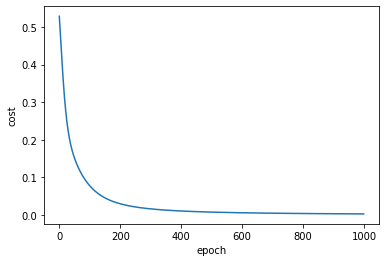

P = 0.03790167905676509
F = 0.9462614853506923


In [ ]:
import numpy as np

# 시그모이드 함수
def s(x):
  return (1/(1+np.exp(-x)))

# 초기 가중치
w = np.empty(9,float)
for i in range(9):
  w[i] = np.random.rand()
b1, b2 = np.random.rand(2)

# 입력, 목표치, 학습속도
i1, i2 = 0.05, 0.10
t1, t2 = 0.01, 0.99
alpha = 0.1
epochs = 1000
C = [] ; c = 0
N = [] ; n = 0
for i in range(epochs):
  y1 = w[1]*i1 + w[2]*i2 + b1 ; y2 = w[3]*i1 + w[4]*i2 + b1
  h1 = s(y1) ; h2 = s(y2)
  n1 = w[5]*h1 + w[6]*h2 + b2 ; n2 = w[7]*h1 + w[8]*h2 + b2
  o1 = s(n1) ; o2 = s(n2)
  c = ((o1-t1)**2 + (o2-t2)**2) ; C.append(c)
  N.append(n) ; n += 1

  d1 = 2*(o1-t1)*o1*(1-o1) ; d2 = 2*(o2-t2)*o2*(1-o2)   # 공통 부분
  w[1] -= alpha*(d1*w[5]+d2*w[7])*h1*(1-h1)*i1
  w[2] -= alpha*(d1*w[5]+d2*w[7])*h1*(1-h1)*i2
  w[3] -= alpha*(d1*w[6]+d2*w[8])*h2*(1-h2)*i1
  w[4] -= alpha*(d1*w[6]+d2*w[8])*h2*(1-h2)*i2
  w[5] -= alpha*d1*h1
  w[6] -= alpha*d1*h2
  w[7] -= alpha*d2*h1
  w[8] -= alpha*d2*h2
  b1 -= alpha*(d1*w[5]+d2*w[7])*h1*(1-h1)
  b2 -= alpha*d1

print('w_1 =',w[1]); print('w_2 =',w[2]); print('w_3 =',w[3]); print('w_4 =',w[4]); print('w_5 =',w[5]); print('w_6 =',w[6]); print('w_7 =',w[7]); print('w_8 =',w[8])
print('b_1 =',b1); print('b_2 =',b2)
print('E = C =',(o1-t1)**2+(o2-t2)**2)

# epoch가 증가함에 따라 cost가 어떻게 줄어드는 지 나타내는 그래프
import matplotlib.pyplot as plt
plt.plot(N,C)
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()

# (i1, i2) = (0.09, 0.15)일 때의 예상 결과
i1 = 0.09 ; i2 = 0.15
h1 = s(w[1]*i1 + w[2]*i2 + b1) ; h2 = s(w[3]*i1 + w[4]*i2 + b1)
o1 = s(w[5]*h1 + w[6]*h2 + b2) ; o2 = s(w[7]*h1 + w[8]*h2 + b2)
print('P =',o1)
print('F =',o2)

**----- 교수님 풀이 ! -----**

$w = \begin{pmatrix} w_1 & w_3 \\ w_2 & w_4 \end{pmatrix}$ <br> <br>
$v = \begin{pmatrix} w_5 & w_7 \\ w_6 & w_8 \end{pmatrix}$ <br> <br>
$b_1 = b_i$ <br>
$b_2 = b_o$ <br>
*** 여기서, b_1과 b_2는 각 한 개씩인데, 교수님은 2개씩 잡아서, 총 b가 4개임 ***

$y_1, y_2 = h_i$ <br>
$h_1, h_2 = h_o$ <br>
$n_1, n_2 = o_i$ <br>
$o_1, o_2 = o_o$ <br>


**==> 잉? 왜 안되냐ㅠ**

In [ ]:
import numpy as np

x = np.array([0.05, 0.10])
t = np.array([0.01, 0.99])

def s(x):
  return (1./(1.+np.exp(-x)))
def cost():
  return ((oo[0]-t[0])**2 + (oo[1]-t[1])**2)

alpha  = 0.1 ; epoch = 1000
w = np.random.random((2,2)) ; v = np.random.random((2,2))
bi = np.random.random(2) ; bo = np.random.random(2)
dw = np.zeros((2,2)) ; dbh = np.zeros(2)
hi = np.empty(2,float) ; ho = np.empty(2,float)
oi = np.empty(2,float) ; oo = np.empty(2,float)
d = np.empty(2,float)
cl = np.empty(2,float)

for n in range(epoch):
  for j in range(2):
    hi[j] = 0.
    for i in range(2): hi[j] += w[j][i]*x[i]
    ho[j] = s(hi[j] + bi[j])
  for j in range(2):
    oi[j] = 0.
    for i in range(2) : oi[j] += v[j][i]*ho[i]
    oo[j] = s(oi[j] + bo[j])
    d[j] = 2.*(oo[j]-t[j])*oo[j]*(1.-oo[j])   ### 편미분에 공통으로 들어가는 부분
  for i in range(2):
    for j in range(2):
      dw[j][i] = 0. ; dbh[j] = 0.
      for k in range(2):
        dw[j][i] += d[k]*v[k][j]*ho[j]*(1.-ho[j])*x[i]
        dbh[j] += d[k]*v[k][j]*ho[j]*(1.-ho[j])
      w[j][i] -= alpha*dw[j][i]
      bi[j] -= alpha*dbh[j]
  for j in range(2):
    for k in range(2):
      v[k][j] -= alpha*d[k]*ho[j]
      bo[k] -= alpha*d[k]
  print(oo)
  cl[n] = cost()

tx = np.array([0.09,0.15])
th = np.empty(2) ; to = np.empty(2)
for i in range(2):
  th[i] = s(w[i][0]*tx[0] + w[i][1]*tx[1] + bh[i])
for i in range(2):
  to[i] = s(v[i][0]*th[0]+v[i][1]*th[1]+bo[i])
print(to)

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':22})
n=np.linspace(0,epoch-1,epoch)
plt.plot(n,cl)
plt.xlim([0,epoch]) ; plt.ylim([0,cl[0]])
plt.xlabel('epoch') ; plt.ylabel('cost')
plt.show()


[0.7723588  0.74889629]
[0.75852495 0.75355251]
[0.74382294 0.75799532]


IndexError: ignored




---



---



**(b) 4개의 데이터를 한 번에 사용하는 batch size = 4인 알고리즘**

**----- 풀이 -----**

- **batch size** : 한 번 학습할 때 사용하는 데이터의 개수
  > batch size = 4 : 4개의 데이터를 사용해서 학습하고 마지막에 가중치 업데이트!


---


- $i_1$ <br>
⟼ $y_1 = w_1 i_1 + w_2 i_2 + b_1$ <br>
⟼ $h_1 = Sigmoid(y_1)$ <br>
⟼ $n_1 = w_5 h_1 + w_6 h_2 + b_2$ <br>
⟼ $o_1 = Sigmoid(n_1)$

- $i_2$ <br>
⟼ $y_2 = w_3 i_1 + w_4 i_2 + b_1$ <br>
⟼ $h_2 = Sigmoid(y_2)$ <br>
⟼ $n_2 = w_7 h_1 + w_8 h_2 + b_2$ <br>
⟼ $o_2 = Sigmoid(n_2)$


---


- $Sigmoid(x) = \frac{1}{1+e^{-x}}$ <br>
⟼ $S'(x) = \frac{-e^{-x}}{(1+e^{-x})^2} = S(1-S)$

- 오차(비용 함수)
  > $E = C_T = \displaystyle\sum_{k=0}^{3} \left[ (o_1 - t_1)^2 + (o_2 - t_2)^2 \right] = \displaystyle\sum_{k=0}^{3} \left[ E_1 + E_2 \right]$

- 가중치 Update
  > $w ⟹ w' = w - \alpha \frac{\partial E}{\partial w}$ <br>
  $b ⟹ b' = b - \alpha \frac{\partial E}{\partial b}$

- 편미분
  > $\frac{\partial E_1}{\partial h_1} = \left( \frac{\partial E_1}{\partial o_1} \right) \left( \frac{\partial o_1}{\partial n_1} \right) \left( \frac{\partial n_1}{\partial h_1} \right) = 2(o_1 - t_1)(o_1(1-o_1))(w_5)$ <br> <br>
  $\frac{\partial E_2}{\partial h_1} = \left( \frac{\partial E_2}{\partial o_2} \right) \left( \frac{\partial o_2}{\partial n_2} \right) \left( \frac{\partial n_2}{\partial h_1} \right) = 2(o_2 - t_2)(o_2(1-o_2))(w_7)$

  > $\frac{\partial E_1}{\partial h_2} = \left( \frac{\partial E_1}{\partial o_1} \right) \left( \frac{\partial o_1}{\partial n_1} \right) \left( \frac{\partial n_1}{\partial h_2} \right) = 2(o_1 - t_1)(o_1(1-o_1))(w_6)$ <br> <br>
  $\frac{\partial E_2}{\partial h_2} = \left( \frac{\partial E_2}{\partial o_2} \right) \left( \frac{\partial o_2}{\partial n_2} \right) \left( \frac{\partial n_2}{\partial h_2} \right) = 2(o_2 - t_2)(o_2(1-o_2))(w_8)$

  > $\frac{\partial E}{\partial w_1} = \left( \frac{\partial E}{\partial h_1} \right) \left( \frac{\partial h_1}{\partial y_1} \right) \left( \frac{\partial y_1}{\partial w_1} \right) = \left( \frac{\partial E_1}{\partial h_1} + \frac{\partial E_2}{\partial h_1} \right) \left( h_1 (1-h_1) \right) (i_1)$

  > $\frac{\partial E}{\partial w_2} = \left( \frac{\partial E}{\partial h_1} \right) \left( \frac{\partial h_1}{\partial y_1} \right) \left( \frac{\partial y_1}{\partial w_2} \right) = \left( \frac{\partial E_1}{\partial h_1} + \frac{\partial E_2}{\partial h_1} \right) \left( h_1 (1-h_1) \right) (i_2)$

  > $\frac{\partial E}{\partial w_3} = \left( \frac{\partial E}{\partial h_2} \right) \left( \frac{\partial h_2}{\partial y_2} \right) \left( \frac{\partial y_2}{\partial w_3} \right) = \left( \frac{\partial E_1}{\partial h_2} + \frac{\partial E_2}{\partial h_2} \right) \left( h_2 (1-h_2) \right) (i_1)$

  > $\frac{\partial E}{\partial w_4} = \left( \frac{\partial E}{\partial h_2} \right) \left( \frac{\partial h_2}{\partial y_2} \right) \left( \frac{\partial y_2}{\partial w_4} \right) = \left( \frac{\partial E_1}{\partial h_2} + \frac{\partial E_2}{\partial h_2} \right) \left( h_2 (1-h_2) \right) (i_2)$

  > $\frac{\partial E}{\partial w_5} = \left( \frac{\partial E}{\partial o_1} \right) \left( \frac{\partial o_1}{\partial n_1} \right) \left( \frac{\partial n_1}{\partial w_5} \right) = 2(o_1 - t_1)(o_1(1-o_1))(h_1)$

  > $\frac{\partial E}{\partial w_6} = \left( \frac{\partial E}{\partial o_1} \right) \left( \frac{\partial o_1}{\partial n_1} \right) \left( \frac{\partial n_1}{\partial w_6} \right) = 2(o_1 - t_1)(o_1(1-o_1))(h_2)$

  > $\frac{\partial E}{\partial w_7} = \left( \frac{\partial E}{\partial o_2} \right) \left( \frac{\partial o_2}{\partial n_2} \right) \left( \frac{\partial n_2}{\partial w_7} \right) = 2(o_2 - t_2)(o_2(1-o_2))(h_1)$

  > $\frac{\partial E}{\partial w_8} = \left( \frac{\partial E}{\partial o_2} \right) \left( \frac{\partial o_2}{\partial n_2} \right) \left( \frac{\partial n_2}{\partial w_8} \right) = 2(o_2 - t_2)(o_2(1-o_2))(h_2)$

  > $\frac{\partial E}{\partial b_1} = \left( \frac{\partial E}{\partial h_1} \right) \left( \frac{\partial h_1}{\partial y_1} \right) \left( \frac{\partial y_1}{\partial b_1} \right) = 2(o_2 - t_2)(o_2(1-o_2))(h_2)$



w_1 = -0.20212115461858537
w_2 = 0.15814538604150336
w_3 = 0.5328345462566177
w_4 = -0.23732397622944548
w_5 = 0.14584206554622464
w_6 = -0.4655043079167991
w_7 = 1.3236341148597446
w_8 = 0.903400754953331
b_1 = 0.9337517880723595
b_2 = -0.6871745298001235
E = C = 1.2969734104384005


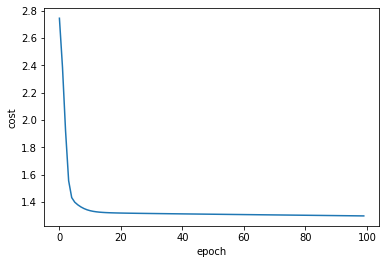

P = 0.28543935821277666
F = 0.7140644590879575


In [ ]:
import numpy as np

# 시그모이드 함수
def s(x):
  return (1/(1+np.exp(-x)))

# 초기 가중치
w = np.empty(9,float)
for i in range(9):
  w[i] = np.random.rand()
b1, b2 = np.random.rand(2)

# 입력, 목표치, 학습속도, 학습 횟수
i1list = [0.05,0.08,0.10,0.15]
i2list = [0.10,0.10,0.07,0.30]
t1list = [0.01,0.05,0.10,0.98]
t2list = [0.99,0.95,0.90,0.02]
alpha = 0.5 ; epochs = 100 ; C = []

for i in range(epochs):
  c = 0 ; dw1 = 0 ; dw2 = 0; dw3 = 0 ; dw4 = 0 ; dw5 = 0 ; dw6 = 0 ; dw7 = 0 ; dw8 = 0 ; db1 = 0 ; db2 = 0
  for j in range(4):
    i1 = i1list[j] ; i2 = i2list[j] ; t1 = t1list[j] ; t2 = t2list[j]
    y1 = w[1]*i1 + w[2]*i2 + b1 ; y2 = w[3]*i1 + w[4]*i2 + b1
    h1 = s(y1) ; h2 = s(y2)
    n1 = w[5]*h1 + w[6]*h2 + b2 ; n2 = w[7]*h1 + w[8]*h2 + b2
    o1 = s(n1) ; o2 = s(n2)
    c += ((o1-t1)**2 + (o2-t2)**2)

    d1 = 2*(o1-t1)*o1*(1-o1) ; d2 = 2*(o2-t2)*o2*(1-o2)   # 공통 부분
    dw1 += alpha*(d1*w[5]+d2*w[7])*h1*(1-h1)*i1
    dw2 += alpha*(d1*w[5]+d2*w[7])*h1*(1-h1)*i2
    dw3 += alpha*(d1*w[6]+d2*w[8])*h2*(1-h2)*i1
    dw4 += alpha*(d1*w[6]+d2*w[8])*h2*(1-h2)*i2
    dw5 += alpha*d1*h1
    dw6 += alpha*d1*h2
    dw7 += alpha*d2*h1
    dw8 += alpha*d2*h2
    db1 += alpha*(d1*w[5]+d2*w[7])*h1*(1-h1)
    db2 += alpha*d1

  C.append(c)
  w[1] -= dw1 ; w[2] -= dw2 ; w[3] -= dw3 ; w[4] -= dw4 ; w[5] -= dw5 ; w[6] -= dw6 ; w[7] -= dw7 ; w[8] -= dw8
  b1 -= db1 ; b2 -= db2

print('w_1 =',w[1]); print('w_2 =',w[2]); print('w_3 =',w[3]); print('w_4 =',w[4]); print('w_5 =',w[5]); print('w_6 =',w[6]); print('w_7 =',w[7]); print('w_8 =',w[8])
print('b_1 =',b1); print('b_2 =',b2)
print('E = C =',C[-1])

# epoch가 증가함에 따라 cost가 어떻게 줄어드는 지 나타내는 그래프
import matplotlib.pyplot as plt
N = [i for i in range(epochs)]
plt.plot(N,C)
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()

# (i1, i2) = (0.09, 0.15)일 때의 예상 결과
i1 = 0.09 ; i2 = 0.15
h1 = s(w[1]*i1 + w[2]*i2 + b1) ; h2 = s(w[3]*i1 + w[4]*i2 + b1)
o1 = s(w[5]*h1 + w[6]*h2 + b2) ; o2 = s(w[7]*h1 + w[8]*h2 + b2)
print('P =',o1)
print('F =',o2)



---



---




**(c) 랜덤하게 데이터를 1개씩 나누어서 학습시키는 batch size 1인 알고리즘**

**----- 풀이 -----**

- 데이터를 랜덤한 순서로 1개씩 선택
  > 예 ) k = (0,3,1,2) or (3,2,0,1) etc
- 하나의 데이터로 학습 ⟶ 총 4번을 가중치 업데이트 !
- **batch size** : 한 번 학습할 때 사용하는 데이터의 개수
  > batch size = 1 : 1개의 데이터를 사용해서 학습하고 가중치 업데이트!
---
- $i_1$ <br>
⟼ $y_1 = w_1 i_1 + w_2 i_2 + b_1$ <br>
⟼ $h_1 = Sigmoid(y_1)$ <br>
⟼ $n_1 = w_5 h_1 + w_6 h_2 + b_2$ <br>
⟼ $o_1 = Sigmoid(n_1)$

- $i_2$ <br>
⟼ $y_2 = w_3 i_1 + w_4 i_2 + b_1$ <br>
⟼ $h_2 = Sigmoid(y_2)$ <br>
⟼ $n_2 = w_7 h_1 + w_8 h_2 + b_2$ <br>
⟼ $o_2 = Sigmoid(n_2)$


---


- $Sigmoid(x) = \frac{1}{1+e^{-x}}$ <br>
⟼ $S'(x) = \frac{-e^{-x}}{(1+e^{-x})^2} = S(1-S)$

- 오차(비용 함수)
  > $E = C_T = \displaystyle\sum_{k=0}^{3} \left[ (o_1 - t_1)^2 + (o_2 - t_2)^2 \right] = \displaystyle\sum_{k=0}^{3} \left[ E_1 + E_2 \right]$

- 가중치 Update
  > $w ⟹ w' = w - \alpha \frac{\partial E}{\partial w}$ <br>
  $b ⟹ b' = b - \alpha \frac{\partial E}{\partial b}$

- 편미분
  > $\frac{\partial E_1}{\partial h_1} = \left( \frac{\partial E_1}{\partial o_1} \right) \left( \frac{\partial o_1}{\partial n_1} \right) \left( \frac{\partial n_1}{\partial h_1} \right) = 2(o_1 - t_1)(o_1(1-o_1))(w_5)$ <br> <br>
  $\frac{\partial E_2}{\partial h_1} = \left( \frac{\partial E_2}{\partial o_2} \right) \left( \frac{\partial o_2}{\partial n_2} \right) \left( \frac{\partial n_2}{\partial h_1} \right) = 2(o_2 - t_2)(o_2(1-o_2))(w_7)$

  > $\frac{\partial E_1}{\partial h_2} = \left( \frac{\partial E_1}{\partial o_1} \right) \left( \frac{\partial o_1}{\partial n_1} \right) \left( \frac{\partial n_1}{\partial h_2} \right) = 2(o_1 - t_1)(o_1(1-o_1))(w_6)$ <br> <br>
  $\frac{\partial E_2}{\partial h_2} = \left( \frac{\partial E_2}{\partial o_2} \right) \left( \frac{\partial o_2}{\partial n_2} \right) \left( \frac{\partial n_2}{\partial h_2} \right) = 2(o_2 - t_2)(o_2(1-o_2))(w_8)$

  > $\frac{\partial E}{\partial w_1} = \left( \frac{\partial E}{\partial h_1} \right) \left( \frac{\partial h_1}{\partial y_1} \right) \left( \frac{\partial y_1}{\partial w_1} \right) = \left( \frac{\partial E_1}{\partial h_1} + \frac{\partial E_2}{\partial h_1} \right) \left( h_1 (1-h_1) \right) (i_1)$

  > $\frac{\partial E}{\partial w_2} = \left( \frac{\partial E}{\partial h_1} \right) \left( \frac{\partial h_1}{\partial y_1} \right) \left( \frac{\partial y_1}{\partial w_2} \right) = \left( \frac{\partial E_1}{\partial h_1} + \frac{\partial E_2}{\partial h_1} \right) \left( h_1 (1-h_1) \right) (i_2)$

  > $\frac{\partial E}{\partial w_3} = \left( \frac{\partial E}{\partial h_2} \right) \left( \frac{\partial h_2}{\partial y_2} \right) \left( \frac{\partial y_2}{\partial w_3} \right) = \left( \frac{\partial E_1}{\partial h_2} + \frac{\partial E_2}{\partial h_2} \right) \left( h_2 (1-h_2) \right) (i_1)$

  > $\frac{\partial E}{\partial w_4} = \left( \frac{\partial E}{\partial h_2} \right) \left( \frac{\partial h_2}{\partial y_2} \right) \left( \frac{\partial y_2}{\partial w_4} \right) = \left( \frac{\partial E_1}{\partial h_2} + \frac{\partial E_2}{\partial h_2} \right) \left( h_2 (1-h_2) \right) (i_2)$

  > $\frac{\partial E}{\partial w_5} = \left( \frac{\partial E}{\partial o_1} \right) \left( \frac{\partial o_1}{\partial n_1} \right) \left( \frac{\partial n_1}{\partial w_5} \right) = 2(o_1 - t_1)(o_1(1-o_1))(h_1)$

  > $\frac{\partial E}{\partial w_6} = \left( \frac{\partial E}{\partial o_1} \right) \left( \frac{\partial o_1}{\partial n_1} \right) \left( \frac{\partial n_1}{\partial w_6} \right) = 2(o_1 - t_1)(o_1(1-o_1))(h_2)$

  > $\frac{\partial E}{\partial w_7} = \left( \frac{\partial E}{\partial o_2} \right) \left( \frac{\partial o_2}{\partial n_2} \right) \left( \frac{\partial n_2}{\partial w_7} \right) = 2(o_2 - t_2)(o_2(1-o_2))(h_1)$

  > $\frac{\partial E}{\partial w_8} = \left( \frac{\partial E}{\partial o_2} \right) \left( \frac{\partial o_2}{\partial n_2} \right) \left( \frac{\partial n_2}{\partial w_8} \right) = 2(o_2 - t_2)(o_2(1-o_2))(h_2)$

  > $\frac{\partial E}{\partial b_1} = \left( \frac{\partial E}{\partial h_1} \right) \left( \frac{\partial h_1}{\partial y_1} \right) \left( \frac{\partial y_1}{\partial b_1} \right) = 2(o_2 - t_2)(o_2(1-o_2))(h_2)$

w_1 = -5.28311771024113
w_2 = -12.388587569204992
w_3 = 1.416408931937796
w_4 = 1.4879629569413453
w_5 = -9.495913681878461
w_6 = 2.1287273784017993
w_7 = 9.040707839907041
w_8 = -7.2544746588375375
b_1 = 2.870760054971809
b_2 = 2.621346125962545
E = C = 0.0013267099365602256


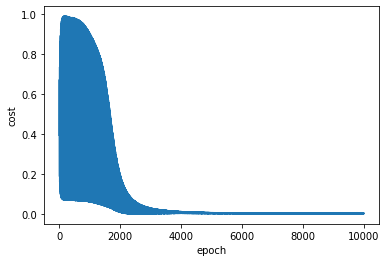

P = 0.21005613251015057
F = 0.7942777679650123


In [ ]:
import numpy as np

# 시그모이드 함수
def s(x):
  return (1/(1+np.exp(-x)))

# 초기 가중치
w = np.empty(9,float)
for i in range(9):
  w[i] = np.random.rand()
b1, b2 = np.random.rand(2)

# 입력, 목표치, 학습속도, 학습 횟수
i1list = [0.05,0.08,0.10,0.15]
i2list = [0.10,0.10,0.07,0.30]
t1list = [0.01,0.05,0.10,0.98]
t2list = [0.99,0.95,0.90,0.02]
alpha = 0.1 ; epochs = 10000 ; C = [] ; index = np.arange(4)

for i in range(epochs):
  np.random.shuffle(index)
  for j in range(4):
    i1 = i1list[index[j]] ; i2 = i2list[index[j]] ; t1 = t1list[index[j]] ; t2 = t2list[index[j]]
    y1 = w[1]*i1 + w[2]*i2 + b1 ; y2 = w[3]*i1 + w[4]*i2 + b1
    h1 = s(y1) ; h2 = s(y2)
    n1 = w[5]*h1 + w[6]*h2 + b2 ; n2 = w[7]*h1 + w[8]*h2 + b2
    o1 = s(n1) ; o2 = s(n2)

    # 가중치 업데이트
    d1 = 2*(o1-t1)*o1*(1-o1) ; d2 = 2*(o2-t2)*o2*(1-o2)   # 공통 부분
    w[1] -= alpha*(d1*w[5]+d2*w[7])*h1*(1-h1)*i1
    w[2] -= alpha*(d1*w[5]+d2*w[7])*h1*(1-h1)*i2
    w[3] -= alpha*(d1*w[6]+d2*w[8])*h2*(1-h2)*i1
    w[4] -= alpha*(d1*w[6]+d2*w[8])*h2*(1-h2)*i2
    w[5] -= alpha*d1*h1
    w[6] -= alpha*d1*h2
    w[7] -= alpha*d2*h1
    w[8] -= alpha*d2*h2
    b1 -= alpha*(d1*w[5]+d2*w[7])*h1*(1-h1)
    b2 -= alpha*d1
  c = ((o1-t1)**2 + (o2-t2)**2) ; C.append(c)

print('w_1 =',w[1]); print('w_2 =',w[2]); print('w_3 =',w[3]); print('w_4 =',w[4]); print('w_5 =',w[5]); print('w_6 =',w[6]); print('w_7 =',w[7]); print('w_8 =',w[8])
print('b_1 =',b1); print('b_2 =',b2)
print('E = C =',C[-1])

# epoch가 증가함에 따라 cost가 어떻게 줄어드는 지 나타내는 그래프
import matplotlib.pyplot as plt
N = [i for i in range(epochs)]
plt.plot(N,C)
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()

# (i1, i2) = (0.09, 0.15)일 때의 예상 결과
i1 = 0.09 ; i2 = 0.15
h1 = s(w[1]*i1 + w[2]*i2 + b1) ; h2 = s(w[3]*i1 + w[4]*i2 + b1)
o1 = s(w[5]*h1 + w[6]*h2 + b2) ; o2 = s(w[7]*h1 + w[8]*h2 + b2)
print('P =',o1)
print('F =',o2)



---



---



**(d) 랜덤하게 데이터를 2개씩 나누어서 학습시키는 batch size 2인 알고리즘**

**----- 풀이 -----**

- 데이터를 랜덤한 순서로 2개씩 선택
  > 예 ) k = (0,3/1,2) or (3,2/0,1) etc
- 두 개의 데이터로 학습 ⟶ 총 2번을 가중치 업데이트 !
- **batch size** : 한 번 학습할 때 사용하는 데이터의 개수
  > batch size = 4 : 2개의 데이터를 사용해서 학습하고 가중치 업데이트!
---
- $i_1$ <br>
⟼ $y_1 = w_1 i_1 + w_2 i_2 + b_1$ <br>
⟼ $h_1 = Sigmoid(y_1)$ <br>
⟼ $n_1 = w_5 h_1 + w_6 h_2 + b_2$ <br>
⟼ $o_1 = Sigmoid(n_1)$

- $i_2$ <br>
⟼ $y_2 = w_3 i_1 + w_4 i_2 + b_1$ <br>
⟼ $h_2 = Sigmoid(y_2)$ <br>
⟼ $n_2 = w_7 h_1 + w_8 h_2 + b_2$ <br>
⟼ $o_2 = Sigmoid(n_2)$


---


- $Sigmoid(x) = \frac{1}{1+e^{-x}}$ <br>
⟼ $S'(x) = \frac{-e^{-x}}{(1+e^{-x})^2} = S(1-S)$

- 오차(비용 함수)
  > $E = C_T = \displaystyle\sum_{k=0}^{3} \left[ (o_1 - t_1)^2 + (o_2 - t_2)^2 \right] = \displaystyle\sum_{k=0}^{3} \left[ E_1 + E_2 \right]$

- 가중치 Update
  > $w ⟹ w' = w - \alpha \frac{\partial E}{\partial w}$ <br>
  $b ⟹ b' = b - \alpha \frac{\partial E}{\partial b}$

- 편미분
  > $\frac{\partial E_1}{\partial h_1} = \left( \frac{\partial E_1}{\partial o_1} \right) \left( \frac{\partial o_1}{\partial n_1} \right) \left( \frac{\partial n_1}{\partial h_1} \right) = 2(o_1 - t_1)(o_1(1-o_1))(w_5)$ <br> <br>
  $\frac{\partial E_2}{\partial h_1} = \left( \frac{\partial E_2}{\partial o_2} \right) \left( \frac{\partial o_2}{\partial n_2} \right) \left( \frac{\partial n_2}{\partial h_1} \right) = 2(o_2 - t_2)(o_2(1-o_2))(w_7)$

  > $\frac{\partial E_1}{\partial h_2} = \left( \frac{\partial E_1}{\partial o_1} \right) \left( \frac{\partial o_1}{\partial n_1} \right) \left( \frac{\partial n_1}{\partial h_2} \right) = 2(o_1 - t_1)(o_1(1-o_1))(w_6)$ <br> <br>
  $\frac{\partial E_2}{\partial h_2} = \left( \frac{\partial E_2}{\partial o_2} \right) \left( \frac{\partial o_2}{\partial n_2} \right) \left( \frac{\partial n_2}{\partial h_2} \right) = 2(o_2 - t_2)(o_2(1-o_2))(w_8)$

  > $\frac{\partial E}{\partial w_1} = \left( \frac{\partial E}{\partial h_1} \right) \left( \frac{\partial h_1}{\partial y_1} \right) \left( \frac{\partial y_1}{\partial w_1} \right) = \left( \frac{\partial E_1}{\partial h_1} + \frac{\partial E_2}{\partial h_1} \right) \left( h_1 (1-h_1) \right) (i_1)$

  > $\frac{\partial E}{\partial w_2} = \left( \frac{\partial E}{\partial h_1} \right) \left( \frac{\partial h_1}{\partial y_1} \right) \left( \frac{\partial y_1}{\partial w_2} \right) = \left( \frac{\partial E_1}{\partial h_1} + \frac{\partial E_2}{\partial h_1} \right) \left( h_1 (1-h_1) \right) (i_2)$

  > $\frac{\partial E}{\partial w_3} = \left( \frac{\partial E}{\partial h_2} \right) \left( \frac{\partial h_2}{\partial y_2} \right) \left( \frac{\partial y_2}{\partial w_3} \right) = \left( \frac{\partial E_1}{\partial h_2} + \frac{\partial E_2}{\partial h_2} \right) \left( h_2 (1-h_2) \right) (i_1)$

  > $\frac{\partial E}{\partial w_4} = \left( \frac{\partial E}{\partial h_2} \right) \left( \frac{\partial h_2}{\partial y_2} \right) \left( \frac{\partial y_2}{\partial w_4} \right) = \left( \frac{\partial E_1}{\partial h_2} + \frac{\partial E_2}{\partial h_2} \right) \left( h_2 (1-h_2) \right) (i_2)$

  > $\frac{\partial E}{\partial w_5} = \left( \frac{\partial E}{\partial o_1} \right) \left( \frac{\partial o_1}{\partial n_1} \right) \left( \frac{\partial n_1}{\partial w_5} \right) = 2(o_1 - t_1)(o_1(1-o_1))(h_1)$

  > $\frac{\partial E}{\partial w_6} = \left( \frac{\partial E}{\partial o_1} \right) \left( \frac{\partial o_1}{\partial n_1} \right) \left( \frac{\partial n_1}{\partial w_6} \right) = 2(o_1 - t_1)(o_1(1-o_1))(h_2)$

  > $\frac{\partial E}{\partial w_7} = \left( \frac{\partial E}{\partial o_2} \right) \left( \frac{\partial o_2}{\partial n_2} \right) \left( \frac{\partial n_2}{\partial w_7} \right) = 2(o_2 - t_2)(o_2(1-o_2))(h_1)$

  > $\frac{\partial E}{\partial w_8} = \left( \frac{\partial E}{\partial o_2} \right) \left( \frac{\partial o_2}{\partial n_2} \right) \left( \frac{\partial n_2}{\partial w_8} \right) = 2(o_2 - t_2)(o_2(1-o_2))(h_2)$

  > $\frac{\partial E}{\partial b_1} = \left( \frac{\partial E}{\partial h_1} \right) \left( \frac{\partial h_1}{\partial y_1} \right) \left( \frac{\partial y_1}{\partial b_1} \right) = 2(o_2 - t_2)(o_2(1-o_2))(h_2)$

w_1 = -4.710840194088453
w_2 = -12.378817985518085
w_3 = 1.5523352383834477
w_4 = 2.228069934480206
w_5 = -9.535903030859348
w_6 = 3.8145857153919405
w_7 = 9.199357380079665
w_8 = -5.685151455240989
b_1 = 2.825043810601711
b_2 = 1.0222649750876234
E = C = 0.0049052868102665865


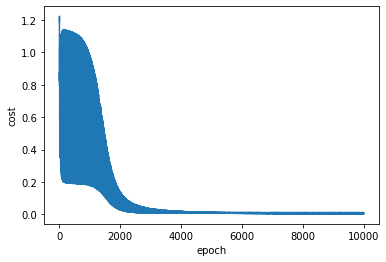

P = 0.20861590224713472
F = 0.7959045829259088


In [ ]:
import numpy as np

# 시그모이드 함수
def s(x):
  return (1/(1+np.exp(-x)))

# 초기 가중치
w = np.empty(9,float)
for i in range(9):
  w[i] = np.random.rand()
b1, b2 = np.random.rand(2)

# 입력, 목표치, 학습속도, 학습 횟수
i1list = [0.05,0.08,0.10,0.15]
i2list = [0.10,0.10,0.07,0.30]
t1list = [0.01,0.05,0.10,0.98]
t2list = [0.99,0.95,0.90,0.02]
alpha = 0.1 ; epochs = 10000 ; C = [] ;

for i in range(epochs):
  index = np.arange(4) ; np.random.shuffle(index) ; index1 = [] ; index2 = []
  for n in range(4):
    if (n == 0) or (n == 1): index1.append(index[n])
    else: index2.append(index[n])

  for l in range(2):
    if l == 0: index = index1
    else: index = index2

    c = 0 ; dw1 = 0 ; dw2 = 0; dw3 = 0 ; dw4 = 0 ; dw5 = 0 ; dw6 = 0 ; dw7 = 0 ; dw8 = 0 ; db1 = 0 ; db2 = 0
    for j in range(2):
      i1 = i1list[index[j]] ; i2 = i2list[index[j]] ; t1 = t1list[index[j]] ; t2 = t2list[index[j]]
      y1 = w[1]*i1 + w[2]*i2 + b1 ; y2 = w[3]*i1 + w[4]*i2 + b1
      h1 = s(y1) ; h2 = s(y2)
      n1 = w[5]*h1 + w[6]*h2 + b2 ; n2 = w[7]*h1 + w[8]*h2 + b2
      o1 = s(n1) ; o2 = s(n2)
      c += ((o1-t1)**2 + (o2-t2)**2)

      # 가중치 합
      d1 = 2*(o1-t1)*o1*(1-o1) ; d2 = 2*(o2-t2)*o2*(1-o2)   # 공통 부분
      dw1 += alpha*(d1*w[5]+d2*w[7])*h1*(1-h1)*i1
      dw2 += alpha*(d1*w[5]+d2*w[7])*h1*(1-h1)*i2
      dw3 += alpha*(d1*w[6]+d2*w[8])*h2*(1-h2)*i1
      dw4 += alpha*(d1*w[6]+d2*w[8])*h2*(1-h2)*i2
      dw5 += alpha*d1*h1
      dw6 += alpha*d1*h2
      dw7 += alpha*d2*h1
      dw8 += alpha*d2*h2
      db1 += alpha*(d1*w[5]+d2*w[7])*h1*(1-h1)
      db2 += alpha*d1

    # 가중치 업데이트
    w[1] -= dw1 ; w[2] -= dw2 ; w[3] -= dw3 ; w[4] -= dw4 ; w[5] -= dw5 ; w[6] -= dw6 ; w[7] -= dw7 ; w[8] -= dw8
    b1 -= db1 ; b2 -= db2
  C.append(c)

print('w_1 =',w[1]); print('w_2 =',w[2]); print('w_3 =',w[3]); print('w_4 =',w[4]); print('w_5 =',w[5]); print('w_6 =',w[6]); print('w_7 =',w[7]); print('w_8 =',w[8])
print('b_1 =',b1); print('b_2 =',b2)
print('E = C =',C[-1])

# epoch가 증가함에 따라 cost가 어떻게 줄어드는 지 나타내는 그래프
import matplotlib.pyplot as plt
N = [i for i in range(epochs)]
plt.plot(N,C)
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()

# (i1, i2) = (0.09, 0.15)일 때의 예상 결과
i1 = 0.09 ; i2 = 0.15
h1 = s(w[1]*i1 + w[2]*i2 + b1) ; h2 = s(w[3]*i1 + w[4]*i2 + b1)
o1 = s(w[5]*h1 + w[6]*h2 + b2) ; o2 = s(w[7]*h1 + w[8]*h2 + b2)
print('P =',o1)
print('F =',o2)